## Projet LOL

### I- Chargement du jeu de données

In [662]:
# Import des librairies

import pandas as pd
import pandas as pd
pd.options.display.max_columns = None

import numpy as np
import random
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [663]:
# Import de la base de données

df = pd.read_csv('C:/Users/gmoba/Documents/Projet LOL/database/matches_with_timeline_complete.csv')

In [665]:
print("Dimension du DataFrame :", df.shape)

Dimension du DataFrame : (3516, 1264)


In [666]:
df.columns.to_list()

['match_id',
 'game_creation',
 'game_duration',
 'game_version',
 'queue_id',
 'map_id',
 'game_mode',
 'game_type',
 'team_100_win',
 'team_100_early_surrendered',
 'team_200_early_surrendered',
 'collected_at',
 'region',
 'source_elo',
 'team_100_first_blood',
 'team_100_first_tower',
 'team_100_first_inhibitor',
 'team_100_first_dragon',
 'team_100_first_rift_herald',
 'team_100_first_baron',
 'team_100_dragon_kills',
 'team_100_baron_kills',
 'team_100_tower_kills',
 'team_100_inhibitor_kills',
 'team_100_rift_herald_kills',
 'team_100_ban_1_champion_id',
 'team_100_ban_2_champion_id',
 'team_100_ban_3_champion_id',
 'team_100_ban_4_champion_id',
 'team_100_ban_5_champion_id',
 'team_100_ban_1_name',
 'team_100_ban_2_name',
 'team_100_ban_3_name',
 'team_100_ban_4_name',
 'team_100_ban_5_name',
 'team_200_first_blood',
 'team_200_first_tower',
 'team_200_first_inhibitor',
 'team_200_first_dragon',
 'team_200_first_rift_herald',
 'team_200_first_baron',
 'team_200_dragon_kills',
 

In [667]:
# Liste des colonnes à garder (Ajouter les gold plus tard)
cols_to_keep = [
    "region",
    "source_elo",
    "game_duration",
    "game_version",
    "team_100_win",
    "team_100_top_champion_name",
    "team_100_jungle_champion_name",
    "team_100_mid_champion_name",
    "team_100_adc_champion_name",
    "team_100_support_champion_name",
    "team_100_ban_1_champion_id",
    "team_100_ban_2_champion_id",
    "team_100_ban_3_champion_id",
    "team_100_ban_4_champion_id",
    "team_100_ban_5_champion_id",
    "team_100_top_summoner_1_name",
    "team_100_top_summoner_2_name",
    "team_200_ban_1_champion_id",
    "team_200_ban_2_champion_id",
    "team_200_ban_3_champion_id",
    "team_200_ban_4_champion_id",
    "team_200_ban_5_champion_id",
    "team_200_top_champion_name",
    "team_200_jungle_champion_name",
    "team_200_mid_champion_name",
    "team_200_adc_champion_name",
    "team_200_support_champion_name",
    "team_200_top_summoner_1_name",
    "team_200_top_summoner_2_name",
    "team_100_first_tower",
    "team_100_tower_kills",
    "team_200_first_tower",
    "team_200_tower_kills"]

# Garde les colonnes
df = df[cols_to_keep]

In [668]:
df.info(max_cols=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3516 entries, 0 to 3515
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   region                          3516 non-null   object
 1   source_elo                      3516 non-null   object
 2   game_duration                   3516 non-null   int64 
 3   game_version                    3516 non-null   object
 4   team_100_win                    3516 non-null   int64 
 5   team_100_top_champion_name      3515 non-null   object
 6   team_100_jungle_champion_name   3514 non-null   object
 7   team_100_mid_champion_name      3516 non-null   object
 8   team_100_adc_champion_name      3514 non-null   object
 9   team_100_support_champion_name  3513 non-null   object
 10  team_100_ban_1_champion_id      3516 non-null   int64 
 11  team_100_ban_2_champion_id      3516 non-null   int64 
 12  team_100_ban_3_champion_id      3516 non-null   

In [674]:
df['game_duration'] = df['game_duration'] / 60

In [676]:
# Colonnes à convertir en object
cols_to_object = [
    "team_100_win",
    "team_100_first_tower",
    "team_200_first_tower",
]

# Ban champion IDs
cols_to_object += [f"team_100_ban_{i}_champion_id" for i in range(1,6)]
cols_to_object += [f"team_200_ban_{i}_champion_id" for i in range(1,6)]

# Conversion en object
for col in cols_to_object:
    df[col] = df[col].astype("object")


In [678]:
# Vérifie les doublons exacts de lignes dans le DataFrame
nb_doublons = df.duplicated().sum()
print(f"Nombre de doublons dans le DataFrame : {nb_doublons}")

Nombre de doublons dans le DataFrame : 0


In [680]:
# Affiche les lignes dupliquées
doublons = df[df.duplicated(keep=False)]  # keep=False pour montrer toutes les occurrences
doublons

,region,source_elo,game_duration,game_version,team_100_win,team_100_top_champion_name,team_100_jungle_champion_name,team_100_mid_champion_name,team_100_adc_champion_name,team_100_support_champion_name,team_100_ban_1_champion_id,team_100_ban_2_champion_id,team_100_ban_3_champion_id,team_100_ban_4_champion_id,team_100_ban_5_champion_id,team_100_top_summoner_1_name,team_100_top_summoner_2_name,team_200_ban_1_champion_id,team_200_ban_2_champion_id,team_200_ban_3_champion_id,team_200_ban_4_champion_id,team_200_ban_5_champion_id,team_200_top_champion_name,team_200_jungle_champion_name,team_200_mid_champion_name,team_200_adc_champion_name,team_200_support_champion_name,team_200_top_summoner_1_name,team_200_top_summoner_2_name,team_100_first_tower,team_100_tower_kills,team_200_first_tower,team_200_tower_kills


In [682]:
# Supprime les doublons et réinitialise l'index
df = df.drop_duplicates().reset_index(drop=True)
print("Doublons supprimés. Nouvelle dimension du DataFrame :", df.shape)

Doublons supprimés. Nouvelle dimension du DataFrame : (3516, 33)


### II- Exploration et nettoyage du jeu de données

In [685]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

df.head()

,region,source_elo,game_duration,game_version,team_100_win,team_100_top_champion_name,team_100_jungle_champion_name,team_100_mid_champion_name,team_100_adc_champion_name,team_100_support_champion_name,team_100_ban_1_champion_id,team_100_ban_2_champion_id,team_100_ban_3_champion_id,team_100_ban_4_champion_id,team_100_ban_5_champion_id,team_100_top_summoner_1_name,team_100_top_summoner_2_name,team_200_ban_1_champion_id,team_200_ban_2_champion_id,team_200_ban_3_champion_id,team_200_ban_4_champion_id,team_200_ban_5_champion_id,team_200_top_champion_name,team_200_jungle_champion_name,team_200_mid_champion_name,team_200_adc_champion_name,team_200_support_champion_name,team_200_top_summoner_1_name,team_200_top_summoner_2_name,team_100_first_tower,team_100_tower_kills,team_200_first_tower,team_200_tower_kills
0,euw1,HIGH_ELO,29.400000,15.22.724.5161,1,Sett,Volibear,Fizz,Sivir,Milio,51,7,498,54,234,Ignite,Flash,7,80,54,246,89,Darius,LeeSin,Orianna,Jinx,Pyke,Ghost,Flash,1,11,0,2
1,euw1,HIGH_ELO,28.466667,15.22.724.5161,0,Jayce,JarvanIV,Syndra,Kaisa,Blitzcrank,517,800,142,111,157,Flash,Teleport,238,246,54,117,119,Sett,Khazix,Viktor,Yunara,Lux,Teleport,Flash,0,4,1,11
2,euw1,HIGH_ELO,27.816667,15.22.724.5161,1,Darius,Khazix,Lissandra,Ziggs,Zilean,236,902,55,54,517,Ghost,Flash,711,67,24,119,11,Volibear,Diana,Yasuo,Smolder,Bard,Flash,Ignite,1,8,0,2
3,euw1,HIGH_ELO,26.600000,15.22.724.5161,1,Darius,Briar,Sylas,Veigar,Poppy,234,43,51,107,67,Ghost,Flash,111,-1,238,101,54,Gragas,Hecarim,Mel,Twitch,Lulu,Teleport,Flash,1,11,0,1
4,euw1,HIGH_ELO,32.033333,15.22.724.5161,0,Mordekaiser,Viego,Swain,Ashe,Lulu,555,131,24,8,2,Ignite,Flash,25,8,107,238,54,Volibear,MonkeyKing,Syndra,Samira,Nautilus,Ignite,Flash,0,5,1,12


In [687]:
df.info(max_cols=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3516 entries, 0 to 3515
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   region                          3516 non-null   object 
 1   source_elo                      3516 non-null   object 
 2   game_duration                   3516 non-null   float64
 3   game_version                    3516 non-null   object 
 4   team_100_win                    3516 non-null   object 
 5   team_100_top_champion_name      3515 non-null   object 
 6   team_100_jungle_champion_name   3514 non-null   object 
 7   team_100_mid_champion_name      3516 non-null   object 
 8   team_100_adc_champion_name      3514 non-null   object 
 9   team_100_support_champion_name  3513 non-null   object 
 10  team_100_ban_1_champion_id      3516 non-null   object 
 11  team_100_ban_2_champion_id      3516 non-null   object 
 12  team_100_ban_3_champion_id      35

In [689]:
df.describe()

,game_duration,team_100_tower_kills,team_200_tower_kills
count,3516.000000,3516.000000,3516.000000
mean,27.215458,5.744312,5.427759
std,6.747068,3.696722,3.702779
min,1.683333,0.000000,0.000000
25%,23.779167,2.000000,2.000000
50%,27.758333,6.000000,5.000000
75%,30.937500,9.000000,9.000000
max,56.583333,15.000000,16.000000


In [691]:
qualitatives = df.select_dtypes(include=["object", "category", "bool"])
quantitatives = df.select_dtypes(include=["int64", "float64"])

print("Variables qualitatives :", qualitatives.shape[1])
print("Variables quantitatives :", quantitatives.shape[1])

Variables qualitatives : 30
Variables quantitatives : 3


In [693]:
df.describe(include=["object", "category", "bool"])

,region,source_elo,game_version,team_100_win,team_100_top_champion_name,team_100_jungle_champion_name,team_100_mid_champion_name,team_100_adc_champion_name,team_100_support_champion_name,team_100_ban_1_champion_id,team_100_ban_2_champion_id,team_100_ban_3_champion_id,team_100_ban_4_champion_id,team_100_ban_5_champion_id,team_100_top_summoner_1_name,team_100_top_summoner_2_name,team_200_ban_1_champion_id,team_200_ban_2_champion_id,team_200_ban_3_champion_id,team_200_ban_4_champion_id,team_200_ban_5_champion_id,team_200_top_champion_name,team_200_jungle_champion_name,team_200_mid_champion_name,team_200_adc_champion_name,team_200_support_champion_name,team_200_top_summoner_1_name,team_200_top_summoner_2_name,team_100_first_tower,team_200_first_tower
count,3516,3516,3516,3516,3515,3514,3516,3514,3513,3516,3516,3516,3516,3516,3515,3515,3516,3516,3516,3516,3516,3513,3516,3513,3514,3516,3513,3513,3516,3516
unique,1,1,46,2,131,80,124,73,90,164,163,164,160,161,7,8,164,160,160,165,164,127,79,121,74,84,7,8,2,2
top,euw1,HIGH_ELO,15.18.710.2811,1,Ambessa,Viego,Syndra,Kaisa,Nami,119,555,555,555,119,Flash,Teleport,119,119,555,119,555,Ambessa,Viego,Syndra,Kaisa,Nami,Flash,Teleport,1,0
freq,3516,3516,989,1823,181,221,179,322,256,246,208,203,175,162,1964,1505,237,220,199,194,149,139,242,151,321,300,2002,1477,1824,1887


In [695]:
cat_unique_summary = pd.DataFrame({
    "dtype": qualitatives.dtypes,
    "unique_values": qualitatives.nunique()
})

print(cat_unique_summary)

                                 dtype  unique_values
region                          object              1
source_elo                      object              1
game_version                    object             46
team_100_win                    object              2
team_100_top_champion_name      object            131
team_100_jungle_champion_name   object             80
team_100_mid_champion_name      object            124
team_100_adc_champion_name      object             73
team_100_support_champion_name  object             90
team_100_ban_1_champion_id      object            164
team_100_ban_2_champion_id      object            163
team_100_ban_3_champion_id      object            164
team_100_ban_4_champion_id      object            160
team_100_ban_5_champion_id      object            161
team_100_top_summoner_1_name    object              7
team_100_top_summoner_2_name    object              8
team_200_ban_1_champion_id      object            164
team_200_ban_2_champion_id  

In [697]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

df_missing = df[df.isna().any(axis=1)]
df_missing

,region,source_elo,game_duration,game_version,team_100_win,team_100_top_champion_name,team_100_jungle_champion_name,team_100_mid_champion_name,team_100_adc_champion_name,team_100_support_champion_name,team_100_ban_1_champion_id,team_100_ban_2_champion_id,team_100_ban_3_champion_id,team_100_ban_4_champion_id,team_100_ban_5_champion_id,team_100_top_summoner_1_name,team_100_top_summoner_2_name,team_200_ban_1_champion_id,team_200_ban_2_champion_id,team_200_ban_3_champion_id,team_200_ban_4_champion_id,team_200_ban_5_champion_id,team_200_top_champion_name,team_200_jungle_champion_name,team_200_mid_champion_name,team_200_adc_champion_name,team_200_support_champion_name,team_200_top_summoner_1_name,team_200_top_summoner_2_name,team_100_first_tower,team_100_tower_kills,team_200_first_tower,team_200_tower_kills
83,euw1,HIGH_ELO,2.450000,15.4.657.5386,1,Yasuo,Qiyana,Malzahar,Kaisa,Thresh,107,893,72,800,98,Flash,Teleport,77,29,-1,497,238,Renekton,LeeSin,NaN,Jhin,Zilean,Flash,Teleport,0,0,0,0
356,euw1,HIGH_ELO,2.700000,15.9.678.1456,0,Varus,Viego,Vladimir,Leona,NaN,2,34,201,18,800,Barrier,Flash,-1,35,117,-1,910,Ezreal,Naafiri,Malzahar,Lucian,Thresh,Ignite,Flash,0,0,0,0
1221,euw1,HIGH_ELO,2.033333,15.15.701.6241,1,Cassiopeia,Khazix,Viktor,Sivir,Janna,777,950,119,157,56,Teleport,Flash,412,950,80,555,55,NaN,Zac,Hwei,Jhin,Nidalee,NaN,NaN,0,0,0,0
1283,euw1,HIGH_ELO,2.200000,15.15.701.6241,0,KSante,Warwick,Sylas,NaN,Alistar,887,893,120,8,51,Teleport,Ghost,555,119,84,5,35,Yasuo,Nocturne,Ryze,Xayah,Rakan,Teleport,Flash,0,0,0,0
1521,euw1,HIGH_ELO,2.000000,15.16.704.6097,1,Ambessa,Lillia,Irelia,Sona,Soraka,238,98,711,804,53,Flash,Teleport,59,201,-1,893,67,Fiora,Sylas,Jayce,NaN,Nautilus,Flash,Teleport,0,0,0,0
1524,euw1,HIGH_ELO,2.566667,15.16.704.6097,0,Renekton,Amumu,Ekko,Kaisa,NaN,897,40,117,111,127,Flash,Ignite,119,164,234,55,238,NaN,Nunu,Jayce,Xayah,Shaco,NaN,NaN,0,0,0,0
1936,euw1,HIGH_ELO,33.800000,15.17.708.5788,0,Vladimir,NaN,Leblanc,Yunara,TahmKench,246,117,51,119,80,Ignite,Flash,117,60,246,119,54,Quinn,Sylas,Hwei,Ezreal,Thresh,Flash,Ignite,1,6,0,9
2152,euw1,HIGH_ELO,3.116667,15.17.708.5788,0,NaN,Ekko,Sylas,Aphelios,Rell,201,203,7,246,23,NaN,NaN,122,246,53,55,555,Udyr,Khazix,Malzahar,Jhin,Velkoz,Teleport,Flash,0,0,0,0
2685,euw1,HIGH_ELO,2.500000,15.18.710.2811,0,Yone,NaN,Leblanc,Ziggs,Pyke,24,77,44,360,-1,Flash,Teleport,-1,106,910,950,24,Kayle,Khazix,Ekko,Caitlyn,Milio,Teleport,Flash,0,0,0,0
2790,euw1,HIGH_ELO,2.083333,15.18.710.2811,1,Darius,Shaco,Kayle,Varus,Nautilus,268,107,246,91,40,Ghost,Flash,117,555,84,92,950,Renekton,Ekko,NaN,Jhin,Nidalee,Flash,Ignite,0,0,0,0


In [699]:
df.isna().any(axis=1).sum()


15

In [701]:
df.shape

(3516, 33)

In [703]:
df = df.dropna()

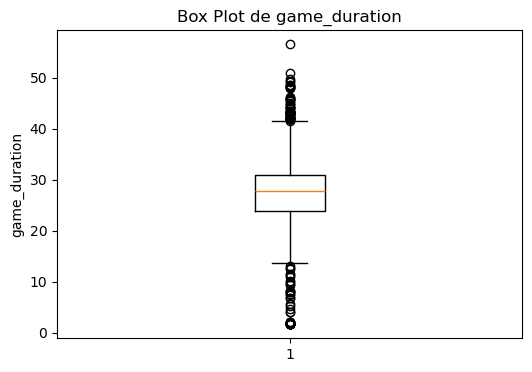

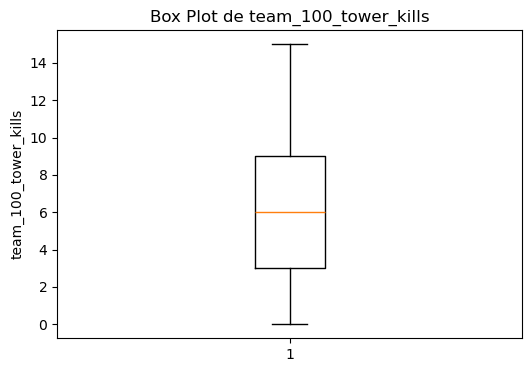

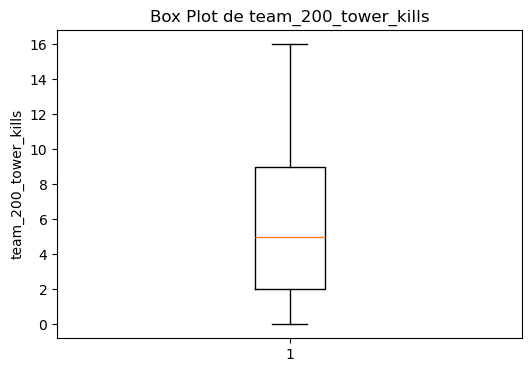

In [705]:
# Boucle sur toutes les colonnes numériques
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna())
    plt.title(f'Box Plot de {col}')
    plt.ylabel(col)
    plt.show()


In [706]:
variables_avec_outliers = []

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # masque des outliers
    mask = (df[col] < lower) | (df[col] > upper)
    
    if mask.any():  # s’il existe au moins 1 outlier
        variables_avec_outliers.append(col)

variables_avec_outliers

['game_duration']

In [707]:
# Vérifie les doublons exacts de lignes dans le DataFrame
nb_doublons = df.duplicated().sum()
print(f"Nombre de doublons dans le DataFrame : {nb_doublons}")

Nombre de doublons dans le DataFrame : 0


In [711]:
# Affiche les lignes dupliquées
doublons = df[df.duplicated(keep=False)]  # keep=False pour montrer toutes les occurrences
doublons

,region,source_elo,game_duration,game_version,team_100_win,team_100_top_champion_name,team_100_jungle_champion_name,team_100_mid_champion_name,team_100_adc_champion_name,team_100_support_champion_name,team_100_ban_1_champion_id,team_100_ban_2_champion_id,team_100_ban_3_champion_id,team_100_ban_4_champion_id,team_100_ban_5_champion_id,team_100_top_summoner_1_name,team_100_top_summoner_2_name,team_200_ban_1_champion_id,team_200_ban_2_champion_id,team_200_ban_3_champion_id,team_200_ban_4_champion_id,team_200_ban_5_champion_id,team_200_top_champion_name,team_200_jungle_champion_name,team_200_mid_champion_name,team_200_adc_champion_name,team_200_support_champion_name,team_200_top_summoner_1_name,team_200_top_summoner_2_name,team_100_first_tower,team_100_tower_kills,team_200_first_tower,team_200_tower_kills


In [713]:
# Supprime les doublons et réinitialise l'index
df = df.drop_duplicates().reset_index(drop=True)
print("Doublons supprimés. Nouvelle dimension du DataFrame :", df.shape)

Doublons supprimés. Nouvelle dimension du DataFrame : (3501, 33)


In [715]:
print("Dimension du DataFrame :", df.shape)

Dimension du DataFrame : (3501, 33)


In [717]:
df.to_csv("C:/Users/gmoba/Documents/Projet LOL/database/matches_with_timeline_complete_clean.csv", index=False)